# Code Setup

## Import modules

In [46]:
# Import modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

## Create dataframes for feature engineering

In [47]:
# Read data
df = pd.read_excel('HW4.xlsx', sheet_name='All Data')

# Create new DataFrames for feature engineering
df_linreg = df.copy()
df_knn = df.copy()
df_regtree = df.copy()

## Set random seed

In [48]:
# Whenever applicable use random state 42 (10 points).
np.random.seed(42) # ensure reproducability

## QQ Plots

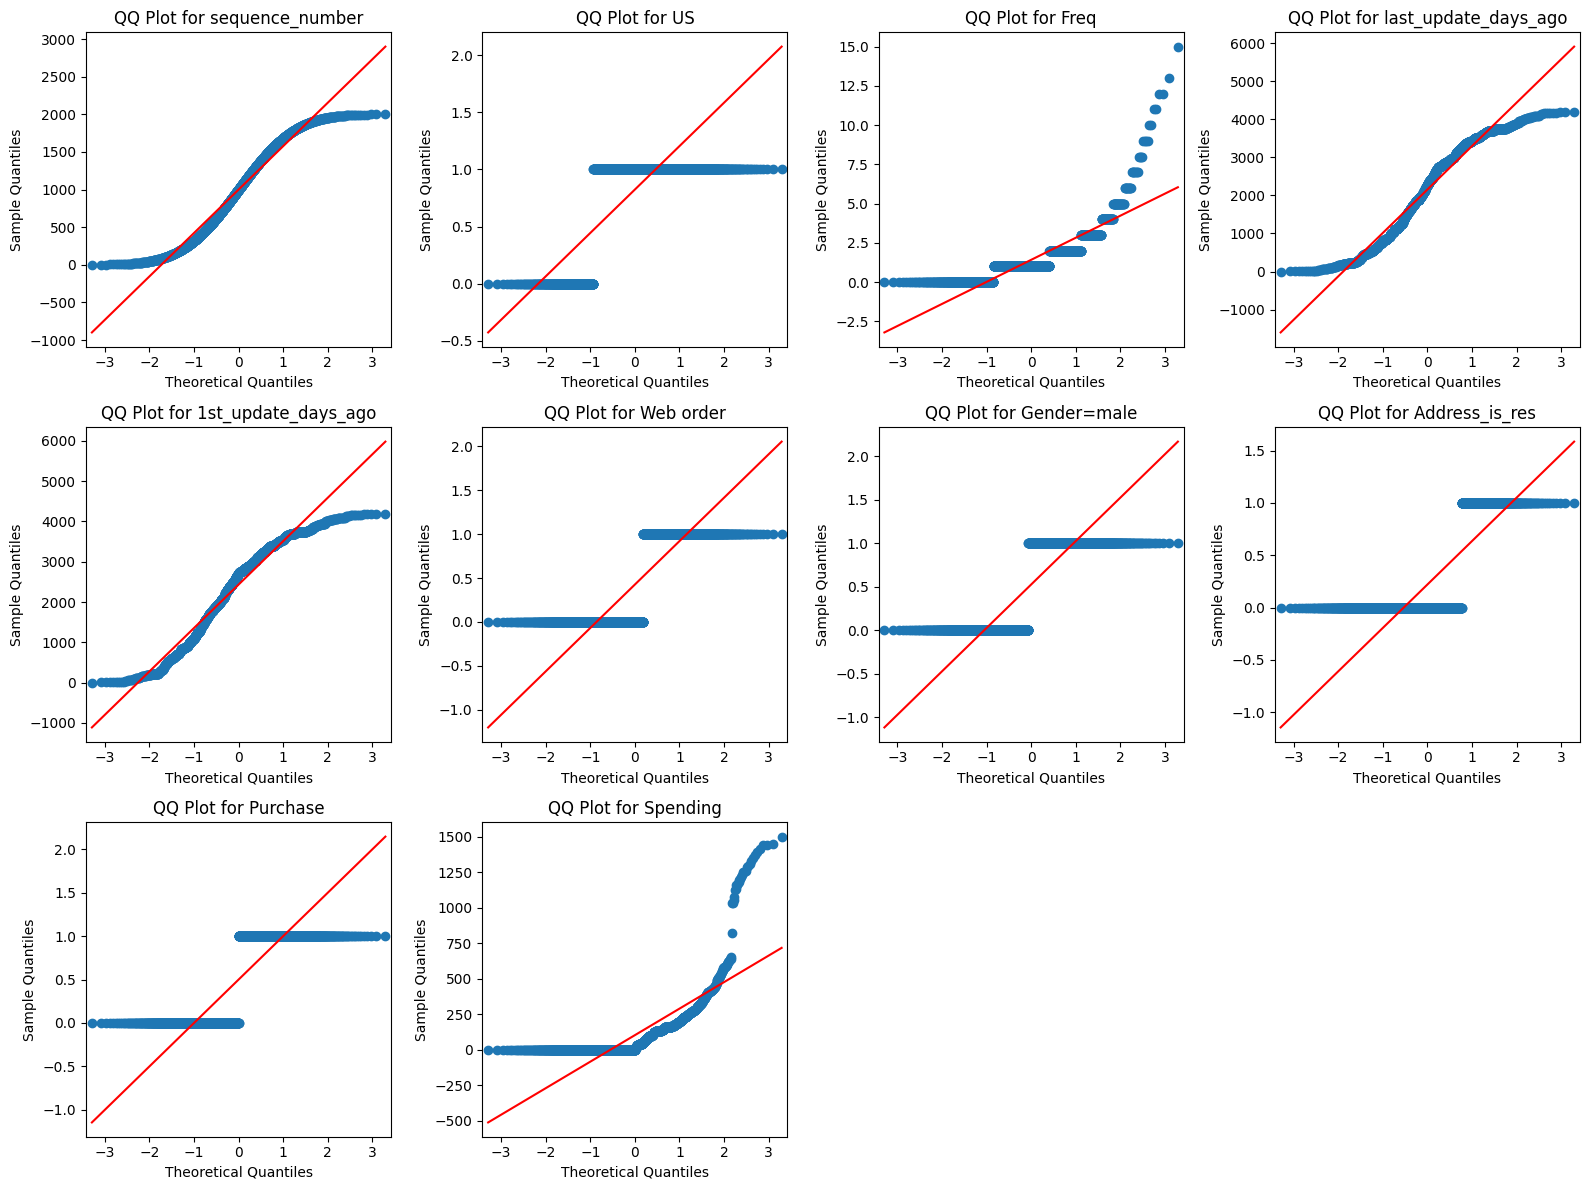

In [49]:
# QQ plots
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import math

# Get column names from df_linreg excluding columns starting with "source_"
cols = [col for col in df_linreg.columns if not col.startswith('source_')]

# Calculate grid dimensions
num_cols = len(cols)
num_rows = math.ceil(num_cols / 4)  # Assuming 4 columns per row, adjust as needed

# Create a grid of QQ plots
fig, axes = plt.subplots(num_rows, 4, figsize=(16, 4*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create QQ plots
for i, col in enumerate(cols):
    # Create QQ plot
    sm.qqplot(df_linreg[col], line='s', ax=axes[i])
    axes[i].set_title(f'QQ Plot for {col}')
    
# Hide empty subplots, if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# Linear Regression

## Setup (Engineer, Transform Features)

### Feature Engineering

In [50]:
# Perform binning, and time series feature engineering steps:

# 1. Calculate the median of the 'Freq' column
median_freq = df_linreg['Freq'].median()
# Create a new column 'Above_Median_Freq' with values 1 if Freq is above median, else 0
df_linreg['Above_Median_Freq'] = (df_linreg['Freq'] > median_freq).astype(int)

# 2. Extract the month and year from the last_update_days_ago and 1st_update_days_ago features
df_linreg['Last_Update_Month'] = pd.to_datetime(df_linreg['last_update_days_ago'], unit='D').dt.month
df_linreg['Last_Update_Year'] = pd.to_datetime(df_linreg['last_update_days_ago'], unit='D').dt.year
df_linreg['First_Update_Month'] = pd.to_datetime(df_linreg['1st_update_days_ago'], unit='D').dt.month
df_linreg['First_Update_Year'] = pd.to_datetime(df_linreg['1st_update_days_ago'], unit='D').dt.year
# Create a new column that captures the time between the first and last update
df_linreg['Update_Time_Difference'] = abs(df_linreg['last_update_days_ago'] - df_linreg['1st_update_days_ago'])

### Feature Transformation

In [51]:
import numpy as np
import pandas as pd

# Check if any column contains 0 values
zero_columns = (df_linreg == 0).any()

# Add 1/3 to all values of columns containing 0
for column in zero_columns[zero_columns].index:
    df_linreg[column] = df_linreg[column] + (1/3)

# Logarithm of the column "Freq"
df_linreg['Freq_log'] = np.log(df_linreg['Freq'])
df_linreg = df_linreg.drop(['Freq'], axis=1)

# Logarithm of the column "Spending"
df_linreg['Spending_log'] = np.log(df_linreg['Spending'])
df_linreg = df_linreg.drop(['Spending'], axis=1)

# Logarithm of the column "Spending"
df_linreg['Update_Time_Difference_log'] = np.log(df_linreg['Update_Time_Difference'])
df_linreg = df_linreg.drop(['Update_Time_Difference'], axis=1)

# Cube root of the column "sequence_number"
df_linreg['sequence_number_log'] = np.log(df_linreg['sequence_number'])
df_linreg = df_linreg.drop(['sequence_number'], axis=1)

# Cube root of the column "last_update_days_ago"
df_linreg['last_update_days_ago_log'] = np.log(df_linreg['last_update_days_ago'])
df_linreg = df_linreg.drop(['last_update_days_ago'], axis=1)

# Cube root of the column "1st_update_days_ago"
df_linreg['1st_update_days_ago_log'] = np.log(df_linreg['1st_update_days_ago'])
df_linreg = df_linreg.drop(['1st_update_days_ago'], axis=1)

### Create Train Test Split

In [52]:
# Create the train-test split:

# Split the data into features (X) and target variable (y)
X = df_linreg.drop(['Spending_log'], axis=1)
y = df_linreg['Spending_log']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scale Features

In [53]:
# Scale features:
from sklearn.preprocessing import StandardScaler # standardize features by removing the mean and scaling to unit variance
                                                 # the standard score of a sample x is calculated as: z = (x - u) / s
                                                 # where u is the mean of the training sample , and s is the standard deviation of the training sample.
                                                 # centering and scaling happens independently on each feature.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)         # computes the mean and std to be used for scaling and performs scaling
X_test = scaler.transform(X_test)               # performs standardization of test set X attributes by centering and scaling

## Linear Regression Modeling

### Fit Linear Regression

In [54]:
# Fit a Linear Regression Model
slr2 = LinearRegression()
slr2.fit(X_train, y_train)
y_train_pred = slr2.predict(X_train)
y_test_pred = slr2.predict(X_test)
print('Slope: %.3f', slr2.coef_)                       # estimated coefficients for the linear regression model

Slope: %.3f [-2.59313770e-02  3.10440182e-02 -3.65330562e-02  8.82298908e-03
 -3.29725400e-03 -2.14523072e-02  2.59777811e-03 -1.46037094e-02
 -7.03194229e-02  1.22103599e-02 -4.47345006e-02  2.62376645e-03
 -2.40862677e-02 -1.88199218e-02 -9.09399023e-03 -4.39071562e-03
 -9.79290032e-03 -7.05021479e-03 -5.96542692e-02  2.76265069e+00
  5.63332931e-02  2.45020903e-02 -1.07799959e-01 -8.54372282e-03
  1.17001570e-01  1.31604940e-01  1.06335667e-01 -2.28476586e-02
 -1.70730047e-01  9.45740665e-02]


### Evaluate Linear Regression

In [55]:
# Evaluate Linear Regression model
from sklearn.metrics import mean_absolute_error # mean absolute error regression loss
from sklearn.metrics import mean_squared_error  # mean squared error regression loss

# See all regression metrics here http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
print('MSE train: %.3f, test: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))  # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values

print('RMSE train: %.3f, test: %.3f' % ( #RMSE
        sqrt(mean_squared_error(y_train, y_train_pred)),
        sqrt(mean_squared_error(y_test, y_test_pred))))

print('MAE train: %.3f, test: %.3f' % ( # mean_squared_error
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) # y_test: Ground truth (correct) target values
                                                   # y_test_pred: Estimated target values


MSE train: 0.331, test: 0.326
RMSE train: 0.576, test: 0.571
MAE train: 0.360, test: 0.363


### Cross Validation

In [56]:
# Use cross-validation with 10 folds to estimate the generalization performance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10,          # number of re-shuffling & splitting iterations
                  test_size=0.3
                  ,random_state=42)

scores = cross_val_score(estimator=slr2,              # 10-fold cross validation
                            X=X,
                            y=y,
                            cv=cv,
                            scoring = 'neg_mean_squared_error',
                            n_jobs=1)
print('Nested MSE score:', scores.mean(), " +/- ", scores.std())
scores = cross_val_score(estimator=slr2,              # 10-fold cross validation
                            X=X,
                            y=y,
                            cv=cv,
                            scoring = 'neg_root_mean_squared_error',
                            n_jobs=1)
print('Nested RMSE score:', scores.mean(), " +/- ", scores.std())


Nested MSE score: -0.3317751154791179  +/-  0.017955786843836537
Nested RMSE score: -0.575793549000504  +/-  0.015391699338348065


### Feature Selection

In [57]:
# Find the best subset of X variables using lasso regression:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

# Initialize Lasso regression model with cross-validation
lasso_model = LassoCV(cv=10, max_iter=10000)

# Fit the Lasso model to the training data
lasso_model.fit(X_train, y_train)

# Get selected feature indices (non-zero coefficients)
selected_feature_indices = np.where(lasso_model.coef_ != 0)[0]

# Get the names of the selected features
selected_feature_names = df_linreg.columns[selected_feature_indices]

# Extract the subset of features based on selected indices
X_subset_train = X_train[:, selected_feature_indices]

# Perform 10-fold cross-validation and calculate the RMSE
scores = np.sqrt(-cross_val_score(lasso_model, X_subset_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1))
mean_score = scores.mean()

# Print the selected features and their names
print("Selected Features (Names):", selected_feature_names)
print("Number of Selected Features:", len(selected_feature_names))
print("Cross-Validation RMSE:", mean_score)

Selected Features (Names): Index(['US', 'source_a', 'source_c', 'source_b', 'source_h', 'source_r',
       'source_s', 'source_u', 'source_p', 'Address_is_res', 'Purchase',
       'Above_Median_Freq', 'Last_Update_Month', 'Last_Update_Year',
       'First_Update_Year', 'Freq_log', 'Spending_log',
       'Update_Time_Difference_log', 'sequence_number_log',
       'last_update_days_ago_log'],
      dtype='object')
Number of Selected Features: 20
Cross-Validation RMSE: 0.5837028000220654


# k-NN Regression

## Setup (Engineer, Scale)

### Feature Engineering

In [58]:
# Perform binning

# 1. Calculate the median of the 'Freq' column
median_freq = df_knn['Freq'].median()
# Create a new column 'Above_Median_Freq' with values 1 if Freq is above median, else 0
df_knn['Above_Median_Freq'] = (df_knn['Freq'] > median_freq).astype(int)

# Perform binning, and time series feature engineering steps:

# 1. Calculate the median of the 'update_days_ago' columns
median_freq = df_knn['last_update_days_ago'].median()
# Create a new column 'Above_Median_last_update' with values 1 if last_update_days_ago is above median, else 0
df_knn['Above_Median_last_update'] = (df_knn['last_update_days_ago'] > median_freq).astype(int)

median_freq = df_knn['1st_update_days_ago'].median()
# Create a new column 'Above_Median_1st_update' with values 1 if '1st_update_days_ago' is above median, else 0
df_knn['Above_Median_1st_update'] = (df_knn['1st_update_days_ago'] > median_freq).astype(int)

### Create Train-Test Split

In [59]:
# Create the train-test split:

# Split the data into features (X) and target variable (y)
X = df_linreg.drop(['Spending_log'], axis=1)
y = df_linreg['Spending_log']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Perform Scaling

In [60]:
# Scale features:
from sklearn.preprocessing import StandardScaler # standardize features by removing the mean and scaling to unit variance
                                                 # the standard score of a sample x is calculated as: z = (x - u) / s
                                                 # where u is the mean of the training sample , and s is the standard deviation of the training sample.
                                                 # centering and scaling happens independently on each feature.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)         # computes the mean and std to be used for scaling and performs scaling
X_test = scaler.transform(X_test)               # performs standardization of test set X attributes by centering and scaling

## k-NN Regression Modeling

In [61]:
################################# Import Libraries & Modules #################################
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

np.random.seed(42) # ensure reproducibility

################################# Nested Cross-Validation #################################

inner_cv = KFold(n_splits=5, shuffle=True) # inner cross-validation folds
outer_cv = KFold(n_splits=5, shuffle=True) # outer cross-validation folds

################################### kNN Parameter Tuning ###################################

# Normalize Data
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Parameters to optimize
params = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
}

# Choosing k for kNN
gs_knn = GridSearchCV(estimator=pipe,
                      param_grid=params,
                      scoring='neg_mean_squared_error',  # Use appropriate scoring metric for regression
                      cv=inner_cv)

gs_knn = gs_knn.fit(X, y)  # Assuming X and y are your feature matrix and target variable
print("\nParameter Tuning #6")
print("Non-nested CV Mean Squared Error: ", -gs_knn.best_score_)  # Note the negation due to negative mean squared error
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)
nested_score_gs_knn = cross_val_score(gs_knn, X=X, y=y, cv=outer_cv, scoring='neg_mean_squared_error')
print("Nested CV Mean Squared Error: ", -nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())

# Parameters to optimize: k for number of nearest neighbors AND type of distance
params = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'knn__weights': ['uniform', 'distance']
}

gs_knn2 = GridSearchCV(estimator=pipe,
                       param_grid=params,
                       scoring='neg_mean_squared_error',
                       cv=inner_cv,
                       n_jobs=4)

gs_knn2 = gs_knn2.fit(X, y)
print("\nParameter Tuning #7")
print("Non-nested CV Mean Squared Error: ", -gs_knn2.best_score_)
print("Optimal Parameter: ", gs_knn2.best_params_)
print("Optimal Estimator: ", gs_knn2.best_estimator_)
nested_score_gs_knn2 = cross_val_score(gs_knn2, X=X, y=y, cv=outer_cv, scoring='neg_mean_squared_error')
print("Nested CV Mean Squared Error: ", -nested_score_gs_knn2.mean(), " +/- ", nested_score_gs_knn2.std())

# Calculate RMSE
rmse_gs_knn = np.sqrt(-nested_score_gs_knn.mean())
rmse_gs_knn2 = np.sqrt(-nested_score_gs_knn2.mean())

print("\nRMSE for Tuning #6: ", rmse_gs_knn)
print("RMSE for Tuning #7: ", rmse_gs_knn2)




Parameter Tuning #6
Non-nested CV Mean Squared Error:  1.743440573050958
Optimal Parameter:  {'knn__n_neighbors': 5}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()), ('knn', KNeighborsRegressor())])
Nested CV Mean Squared Error:  1.7960625190580537  +/-  0.16937855701078636

Parameter Tuning #7
Non-nested CV Mean Squared Error:  1.6904036807018366
Optimal Parameter:  {'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsRegressor(weights='distance'))])
Nested CV Mean Squared Error:  1.7103458168455312  +/-  0.1539103830601661

RMSE for Tuning #6:  1.3401725706259078
RMSE for Tuning #7:  1.307801902753445
